In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score

# Load Training Dataframes

### TRAIN_CATEGORICAL.csv
Stores categorical metadata (Demographics)

In [2]:
filePath = "../data/raw/train/TRAIN_CATEGORICAL.csv"
dfCat = pd.read_csv(filePath)
dfCat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [3]:
dfCat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

### TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
Stores functional MRI connectome matrices

In [4]:
filePath = "../data/raw/train/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
dfFCM = pd.read_csv(filePath)
dfFCM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [5]:
dfFCM.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

### TRAIN_QUANTITATIVE.csv
Stores quantitative metadata (test scores)

In [6]:
filePath = "../data/raw/train/TRAIN_QUANTITATIVE.csv"
dfQ = pd.read_csv(filePath)
dfQ.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [7]:
dfQ.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

### TRAINING_SOLUTIONS.csv
Stores the target solutions

In [8]:
filePath = "../data/raw/train/TRAINING_SOLUTIONS.csv"
dfS = pd.read_csv(filePath)
dfS.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [9]:
dfS.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

# Exploratory Data Analysis
Implementing various analysis techniques to investigate data, understand its structure, and discover any missing values and outliers.

### dfCat: Contains the TRAIN_CATEGORICAL.csv dataframe
Using `df.dypes` to summarize and verify the datatypes within each column in the dataframe.

In [10]:
dfCat.dtypes

participant_id                       object
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race         float64
MRI_Track_Scan_Location             float64
Barratt_Barratt_P1_Edu              float64
Barratt_Barratt_P1_Occ              float64
Barratt_Barratt_P2_Edu              float64
Barratt_Barratt_P2_Occ              float64
dtype: object

In [11]:
dfCat.duplicated(subset='participant_id').sum()

np.int64(0)

Create the correlation matrix using `df.corr()` and visualize it using `sns.heatmap()` and `plt.show()`. Drop rows or columns if required using `df.drop()`.

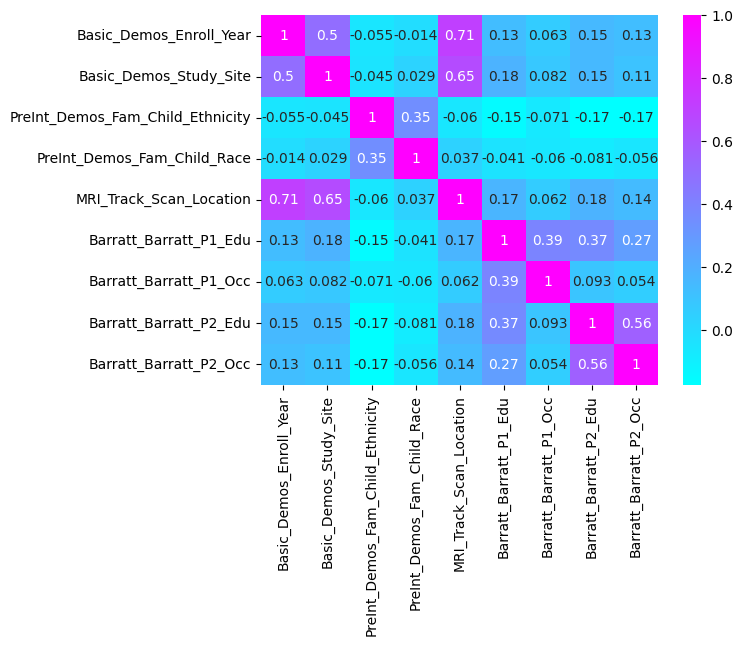

In [12]:
sns.heatmap(dfCat.select_dtypes(include=['number']).corr(), annot=True, cmap='cool')
plt.show()

In [13]:
catCols = dfCat.columns[2:]
for col in catCols:
    dfCat[col] = dfCat[col].astype('category')
dfCat.dtypes

participant_id                        object
Basic_Demos_Enroll_Year                int64
Basic_Demos_Study_Site              category
PreInt_Demos_Fam_Child_Ethnicity    category
PreInt_Demos_Fam_Child_Race         category
MRI_Track_Scan_Location             category
Barratt_Barratt_P1_Edu              category
Barratt_Barratt_P1_Occ              category
Barratt_Barratt_P2_Edu              category
Barratt_Barratt_P2_Occ              category
dtype: object

In [14]:
dfCat_new = dfCat.drop(columns=['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Occ'])

### dfQ: Contains the TRAIN_QUANTITATIVE.csv dataframe
Using `df.dypes` to summarize and verify the datatypes within each column in the dataframe.

In [15]:
dfQ.dtypes

participant_id                 object
EHQ_EHQ_Total                 float64
ColorVision_CV_Score          float64
APQ_P_APQ_P_CP                float64
APQ_P_APQ_P_ID                float64
APQ_P_APQ_P_INV               float64
APQ_P_APQ_P_OPD               float64
APQ_P_APQ_P_PM                float64
APQ_P_APQ_P_PP                float64
SDQ_SDQ_Conduct_Problems      float64
SDQ_SDQ_Difficulties_Total    float64
SDQ_SDQ_Emotional_Problems    float64
SDQ_SDQ_Externalizing         float64
SDQ_SDQ_Generating_Impact     float64
SDQ_SDQ_Hyperactivity         float64
SDQ_SDQ_Internalizing         float64
SDQ_SDQ_Peer_Problems         float64
SDQ_SDQ_Prosocial             float64
MRI_Track_Age_at_Scan         float64
dtype: object

In [16]:
dfQ.duplicated(subset='participant_id').sum()

np.int64(0)

Create the correlation matrix using `df.corr()` and visualize it using `sns.heatmap()` and `plt.show()`. Drop rows or columns if required using `df.drop()`.

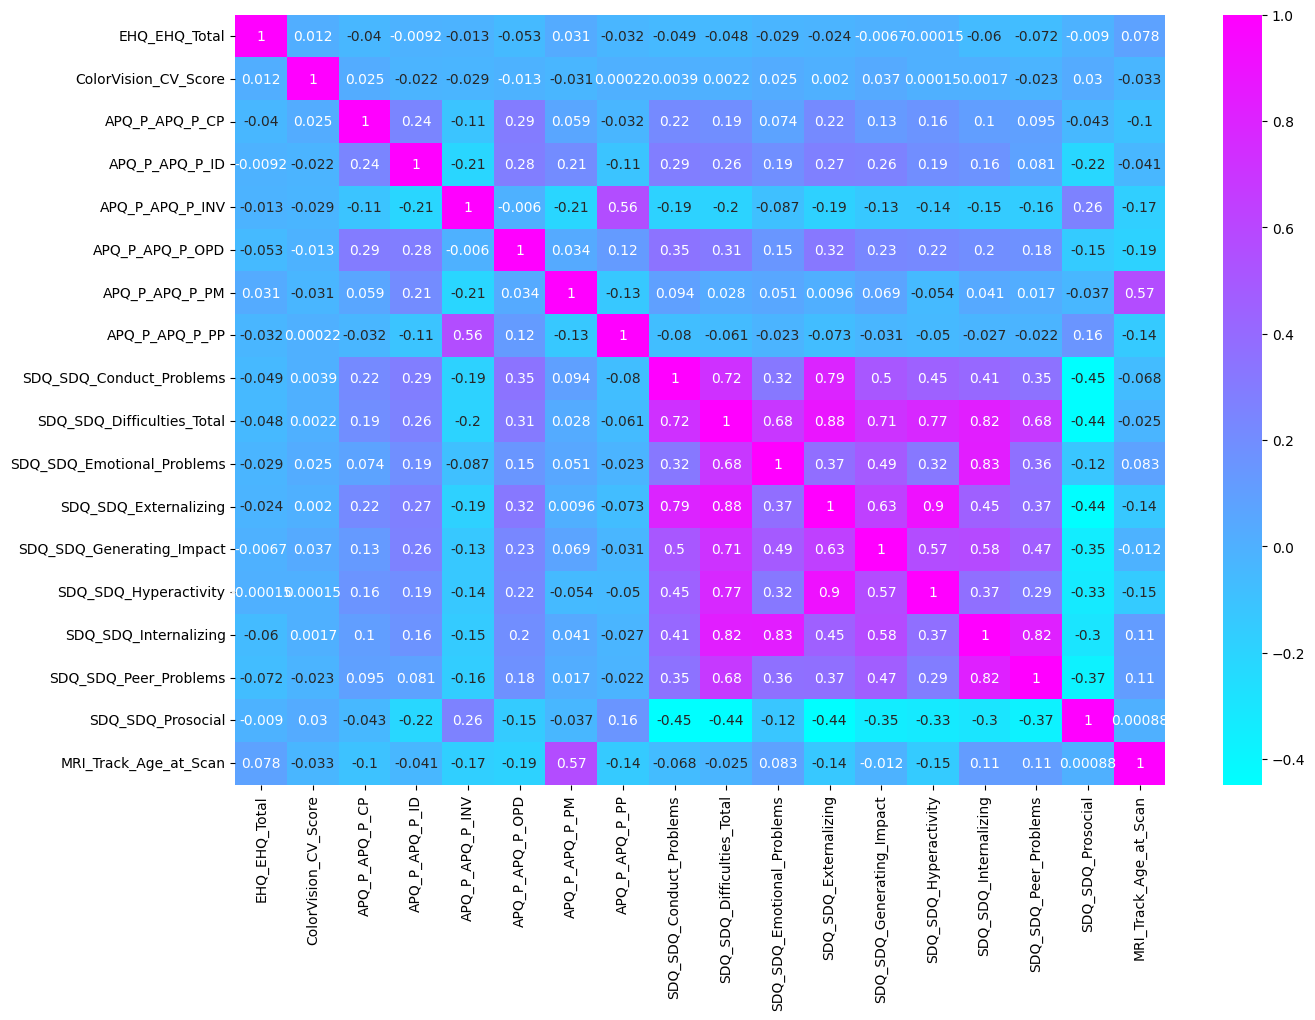

In [17]:
figure, axis = plt.subplots(figsize=(15, 10))
sns.heatmap(dfQ.select_dtypes(include=['number']).corr(), annot=True, cmap='cool', ax=axis)
plt.show()

In [18]:
dfQ_new = dfQ.drop(columns=['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'MRI_Track_Age_at_Scan'])

### dfFCM: Contains the TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv dataframe
Using `df.dypes` to summarize and verify the datatypes within each column in the dataframe.

In [19]:
dfFCM.dtypes

participant_id           object
0throw_1thcolumn        float64
0throw_2thcolumn        float64
0throw_3thcolumn        float64
0throw_4thcolumn        float64
                         ...   
196throw_198thcolumn    float64
196throw_199thcolumn    float64
197throw_198thcolumn    float64
197throw_199thcolumn    float64
198throw_199thcolumn    float64
Length: 19901, dtype: object

In [20]:
dfFCM.duplicated(subset='participant_id').sum()

np.int64(0)

# Label Encoding
Since machine learning models cannot directly work with strings and categorical data, encode the categorical data into a form that the machine learning model understands. Label encoding will convert each category into a single interger value.

In [21]:
le = LabelEncoder()
catCols = dfCat_new.drop(columns='participant_id').columns
for col in catCols:
    dfCat_new[col] = le.fit_transform(dfCat_new[col])

# Merging Training Dataframes
Combining the Categorical, Quantitative, and Functional Connectome Matrices to prepare for training the Binary classifier model. Since all the files contain the `participant_id`, use this as a basis to merge all the files, ensuring that the data values remain consistent for each participant. Use `.merge()` to create the merged dataframe and `head()` to view the first five rows of the dataframe.

In [22]:
dfCatFCM = pd.merge(dfCat_new, dfFCM, on='participant_id')
dfTrain = pd.merge(dfCatFCM, dfQ_new, on='participant_id')

In [23]:
dfTrain.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P2_Edu,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,...,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial
0,00aIpNTbG5uh,1,0,6,7,0.361339,0.791402,0.530706,0.623133,0.845830,...,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0
1,00fV0OyyoLfw,0,7,6,6,0.051430,0.613198,0.635255,0.391237,0.451225,...,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0
2,04X1eiS79T4B,1,2,2,7,-0.305747,0.750316,-0.005342,0.458421,0.757530,...,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0
3,05ocQutkURd6,3,6,5,5,0.450442,0.731530,0.799147,0.701688,0.747468,...,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0
4,06YUNBA9ZRLq,0,1,3,7,0.415220,0.585700,0.355835,0.664142,0.683491,...,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0


# Handling Null Values
Now that the dataframe is merged, remove any Null values. Use `df.isnull()` to check all values that equal `NaN` and to summarize the total of these `NaN` values using `df.sum()`. Drop rows or columns if required using `df.dropna()`. Fill any `NaN` columns with `df.fillna()`.

In [24]:
dfTrain.isnull().sum()

participant_id                      0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
Barratt_Barratt_P1_Edu              0
Barratt_Barratt_P2_Edu              0
                                   ..
SDQ_SDQ_Generating_Impact           9
SDQ_SDQ_Hyperactivity               9
SDQ_SDQ_Internalizing               9
SDQ_SDQ_Peer_Problems               9
SDQ_SDQ_Prosocial                   9
Length: 19920, dtype: int64

In [25]:
mergedCols = dfTrain.columns[1:]
for col in mergedCols:
    if dfTrain[col].isnull().sum() != 0:
        dfTrain.fillna({col: dfTrain[col].mean()}, inplace=True)

# Training the Multi Outcome Model
Since our binary classifier is supposed to predict more than one values, it is better to use a multi outcome model. The model does not require the participant id, so drop that using `df.drop()`. Use the merged dataframe as the X training set and `dfS` as the Y training set to split the data using `train_test_split()`.

In [26]:
X_Train = dfTrain.drop(columns=['participant_id'])
Y_Train = dfS.drop(columns=['participant_id'])

In [27]:
X_Train_Train, X_Train_Test, Y_Train_Train, Y_Train_Test = train_test_split(X_Train, Y_Train, test_size=0.20, random_state=42)

In [28]:
Y_Train_Train.value_counts(normalize=True)

ADHD_Outcome  Sex_F
1             0        0.461856
              1        0.211340
0             0        0.183505
              1        0.143299
Name: proportion, dtype: float64

Use `XGBClassifier` to create an instance of the XGBoost model. Fit the model to predict multiple outcomes using `MultiOutputClassifier`.

In [29]:
model = XGBClassifier(objective='binary:logistic', n_estimators=300, learning_rate=0.01, max_depth=5, scale_pos_weight=(Y_Train_Train['Sex_F'] == 0).sum() / (Y_Train_Train['Sex_F'] == 1).sum())
multiModel = MultiOutputClassifier(model)

Train the model using `model.fit()` and the `X_Train` and `Y_Train` datasets.

In [30]:
multiModel.fit(X_Train_Train, Y_Train_Train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.01, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

# Testing the Model
To test whether our XGBoost model correctly predicts the outcomes, use the `X_Train_Test` X testing set and the `Y_Train_Test` as the Y testing set, and the `model.predict()`.

In [31]:
Y_Train_Pred = multiModel.predict(X_Train_Test)

# Evaluating the Accuracy Score of the Model
Use `accuracy_score()` to score your model.

In [32]:
print('Validation Accuracy:', accuracy_score(Y_Train_Test, Y_Train_Pred))

Validation Accuracy: 0.49794238683127573


# Load Test Dataframes


### TEST_CATEGORICAL.csv
Stores categorical metadata (Demographics)

In [33]:
filePath = "../data/raw/test/TEST_CATEGORICAL.csv"
dfCatTest = pd.read_csv(filePath)
dfCatTest.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [34]:
dfCatTest.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

### TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
Stores functional MRI connectome matrices

In [35]:
filePath = "../data/raw/test/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
dfFCMTest = pd.read_csv(filePath)
dfFCMTest.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [36]:
dfFCMTest.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

### TEST_QUANTITATIVE_METADATA.csv
Stores quantitative metadata (test scores)

In [37]:
filePath = "../data/raw/test/TEST_QUANTITATIVE_METADATA.csv"
dfQTest = pd.read_csv(filePath)
dfQTest.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [38]:
dfQTest.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

# Converting Datatypes, Dropping Columns, and Label Encoding
Convert the integer / float data in the categorical dataframe to category.

Drop any unnecessary columns using `df.drop()`.

Since machine learning models cannot directly work with strings and categorical data, encode the categorical data into a form that the machine learning model understands. Label encoding will convert each category into a single interger value.

In [39]:
catCols = dfCatTest.columns[2:]
for col in catCols:
    dfCatTest[col] = dfCatTest[col].astype('category')
dfCatTest.dtypes

participant_id                        object
Basic_Demos_Enroll_Year                int64
Basic_Demos_Study_Site              category
PreInt_Demos_Fam_Child_Ethnicity    category
PreInt_Demos_Fam_Child_Race         category
MRI_Track_Scan_Location             category
Barratt_Barratt_P1_Edu              category
Barratt_Barratt_P1_Occ              category
Barratt_Barratt_P2_Edu              category
Barratt_Barratt_P2_Occ              category
dtype: object

In [40]:
dfCatTest_new = dfCatTest.drop(columns=['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Occ'])
dfQTest_new = dfQTest.drop(columns=['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'MRI_Track_Age_at_Scan'])

In [41]:
le = LabelEncoder()
catCols = dfCatTest_new.drop(columns='participant_id').columns
for col in catCols:
    dfCat_new[col] = le.fit_transform(dfCat_new[col])

# Merging Test Dataframes
Combining the Categorical, Quantitative, and Functional Connectome Matrices to prepare for testing the Binary classifier model. Since all the files contain the `participant_id`, use this as a basis to merge all the files, ensuring that the data values remain consistent for each participant. Use `.merge()` to create the merged dataframe and `head()` to view the first five rows of the dataframe.

In [42]:
dfCatFCMTest = pd.merge(dfCatTest_new, dfFCMTest, on='participant_id')
dfTest = pd.merge(dfCatFCMTest, dfQTest_new, on='participant_id')

In [43]:
dfTest.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P2_Edu,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,...,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial
0,Cfwaf5FX7jWK,0.0,0.0,21.0,18.0,0.548480,0.713607,0.557319,0.524369,0.693364,...,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0
1,vhGrzmvA3Hjq,0.0,0.0,21.0,NaN,0.427740,0.363022,0.402862,0.363003,0.534558,...,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0
2,ULliyEXjy4OV,0.0,0.0,21.0,18.0,0.139572,0.390106,-0.087041,0.196852,0.088148,...,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0
3,LZfeAb1xMtql,0.0,0.0,21.0,21.0,0.133561,0.778326,0.416355,0.471840,0.568460,...,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0
4,EnFOUv0YK1RG,2.0,0.0,18.0,21.0,0.126699,0.575446,0.509422,0.363193,0.427544,...,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0


# Handling Null Values
Now that the dataframe is merged, remove any Null values. Use `df.isnull()` to check all values that equal `NaN` and to summarize the total of these `NaN` values using `df.sum()`. Drop rows or columns if required using `df.dropna()`.

In [44]:
dfQTest_new.isnull().sum()

participant_id                 0
APQ_P_APQ_P_CP                15
APQ_P_APQ_P_ID                15
APQ_P_APQ_P_INV               15
APQ_P_APQ_P_OPD               15
APQ_P_APQ_P_PM                15
APQ_P_APQ_P_PP                15
SDQ_SDQ_Conduct_Problems      30
SDQ_SDQ_Difficulties_Total    30
SDQ_SDQ_Emotional_Problems    30
SDQ_SDQ_Externalizing         30
SDQ_SDQ_Generating_Impact     30
SDQ_SDQ_Hyperactivity         30
SDQ_SDQ_Internalizing         30
SDQ_SDQ_Peer_Problems         30
SDQ_SDQ_Prosocial             30
dtype: int64

In [45]:
dfTest.dropna(how='any')

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P2_Edu,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,...,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial
0,Cfwaf5FX7jWK,0.0,0.0,21.0,18.0,0.548480,0.713607,0.557319,0.524369,0.693364,...,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0
2,ULliyEXjy4OV,0.0,0.0,21.0,18.0,0.139572,0.390106,-0.087041,0.196852,0.088148,...,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0
3,LZfeAb1xMtql,0.0,0.0,21.0,21.0,0.133561,0.778326,0.416355,0.471840,0.568460,...,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0
4,EnFOUv0YK1RG,2.0,0.0,18.0,21.0,0.126699,0.575446,0.509422,0.363193,0.427544,...,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0
6,PRKZcnOgqcuk,1.0,2.0,21.0,21.0,0.370268,0.580100,0.487113,0.506324,0.582185,...,24.0,1.0,6.0,1.0,5.0,0.0,4.0,1.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,0.0,0.0,18.0,18.0,0.029721,0.596742,0.361898,0.292066,0.553130,...,25.0,1.0,18.0,7.0,7.0,5.0,6.0,11.0,4.0,7.0
300,IUEHiLmQAqCi,0.0,1.0,18.0,21.0,0.025985,0.347840,0.304804,0.463090,0.305321,...,29.0,2.0,16.0,2.0,11.0,5.0,9.0,5.0,3.0,8.0
301,cRySmCadYFRO,0.0,8.0,21.0,15.0,0.105385,0.443624,-0.019777,0.435582,0.376492,...,28.0,1.0,11.0,4.0,4.0,4.0,3.0,7.0,3.0,10.0
302,E3MvDUtJadc5,0.0,8.0,21.0,21.0,0.345641,0.758986,0.748153,0.442141,0.571924,...,22.0,5.0,21.0,2.0,10.0,6.0,5.0,11.0,9.0,0.0


# Storing the Predictions into a Dataframe
Make the test predictions using `model.predict()`. Create and write the binary classifier outcomes to a `.csv` file.

In [46]:
X_Test = dfTest.drop(columns=['participant_id'])

In [47]:
Y_Test_Pred = multiModel.predict(X_Test)

In [48]:
sub = pd.read_csv('../data/SAMPLE_SUBMISSION.csv')
sub['ADHD_Outcome'] = Y_Test_Pred[:,0]
sub['Sex_F'] = Y_Test_Pred[:,1]
sub.to_csv('submission2.csv', index=False)